# Testing the GO term reduncancy reduction pipeline with all transporters from Uniprot

In [1]:
from subpred.util import load_df
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(rc={"figure.figsize": (10, 6)})
pd.set_option("display.max_rows", 500)

Creating the dataset with the broadest possible parameters, to get statistics:

In [2]:
from subpred.transmembrane_transporters import get_transmembrane_transporter_dataset

# With organisms other than yeast, it might be interesting to cluster at 100% sequence similarity at the beginning
df_sequences, df_uniprot_goa, df_go_chebi = get_transmembrane_transporter_dataset(
    organism_ids=None,
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
display(df_sequences)
display(df_uniprot_goa)
display(df_go_chebi)

,sequence,reviewed,protein_existence,organism_id,protein_names
Uniprot,,,,,
B7U540,MTAASRANPYSIVSLEEDGLHLVTMSGANGFGNGKVHTRRRCRNRF...,True,1,9606,Inward rectifier potassium channel 18 (Inward ...
O00168,MASLGHILVFCVGLLTMAKAESPKEHDPFTYDYQSLQIGGLVIAGI...,True,1,9606,Phospholemman (FXYD domain-containing ion tran...
O00337,MENDPSRRRESISLTPVAKGLENMGADFLESLEEGQLPRSDLSPAE...,True,1,9606,Sodium/nucleoside cotransporter 1 (Concentrati...
O00400,MSPTISHKDSSRQRRPGNFSHSLDMKSGPLPPGGWDDSHLDSAGRE...,True,1,9606,Acetyl-coenzyme A transporter 1 (AT-1) (Acetyl...
O14925,MEGGGGSGNKTTGGLAGFFGAGGAGYSHADLAGVPLTGMNPLSPYL...,True,1,9606,Mitochondrial import inner membrane translocas...
...,...,...,...,...,...
X5IHB7,MGPLHVPSSSPQHSKLQRVYHLLLFHVHPFWVQLLYFLFISLFGFL...,False,2,29695,Sodium transporter HKT15
X5II77,MGPLHVPSSSPQHSKLQRVYRLLLFHVHPFWIQLLYFLFISLFGFL...,False,2,29695,Sodium transporter HKT15
X5IYJ3,MGPLHVPSSSPQHSKLQRVYHLLLFHVHPFWVQLLYFLFISLFGFL...,False,2,29695,Sodium transporter HKT15


,Uniprot,qualifier,go_id,go_term,evidence_code,aspect,go_id_ancestor,go_term_ancestor
0,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0015288,porin activity
1,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0022829,wide pore channel activity
2,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0022803,passive transmembrane transporter activity
3,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0022857,transmembrane transporter activity
4,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0015267,channel activity
...,...,...,...,...,...,...,...,...
1005409,Z4YKJ7,enables,GO:0015501,glutamate:sodium symporter activity,IEA,F,GO:0046943,carboxylic acid transmembrane transporter acti...
1005410,Z4YKJ7,enables,GO:0015501,glutamate:sodium symporter activity,IEA,F,GO:0005416,amino acid:monoatomic cation symporter activity
1005411,Z4YKJ7,enables,GO:0015501,glutamate:sodium symporter activity,IEA,F,GO:0008324,monoatomic cation transmembrane transporter ac...
1005412,Z4YKJ7,enables,GO:0015501,glutamate:sodium symporter activity,IEA,F,GO:0015318,inorganic molecular entity transmembrane trans...


,go_id,go_term,chebi_id,chebi_term,chebi_go_relation,chebi_id_ancestor,chebi_term_ancestor
0,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:36357,polyatomic entity
1,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:36916,cation
2,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:36358,polyatomic ion
3,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33703,amino-acid cation
4,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:62031,polar amino acid zwitterion
...,...,...,...,...,...,...,...
24979,GO:1905948,"ABC-type 3',5'-cyclic GMP transmembrane transp...",CHEBI:57746,"3',5'-cyclic GMP(1-)",has_primary_input,CHEBI:33675,p-block molecular entity
24980,GO:1905948,"ABC-type 3',5'-cyclic GMP transmembrane transp...",CHEBI:57746,"3',5'-cyclic GMP(1-)",has_primary_input,CHEBI:26079,phosphoric acid derivative
24981,GO:1905948,"ABC-type 3',5'-cyclic GMP transmembrane transp...",CHEBI:57746,"3',5'-cyclic GMP(1-)",has_primary_input,CHEBI:33579,main group molecular entity
24982,GO:1905948,"ABC-type 3',5'-cyclic GMP transmembrane transp...",CHEBI:57746,"3',5'-cyclic GMP(1-)",has_primary_input,CHEBI:58945,organophosphate oxoanion


### Analysis

In [3]:
import numpy as np
import pandas as pd
from subpred.cdhit import cd_hit
from subpred.util import load_df
import multiprocessing


def get_stats(df_sequences, df_uniprot_goa):

    df_sequences_merge = df_sequences.join(load_df("uniprot")["gene_names"], how="left")
    df_sequences_merge["has_gene_name"] = ~df_sequences_merge.gene_names.isnull()
    df_sequences_merge = df_sequences_merge.drop(
        ["gene_names", "protein_names"], axis=1
    )

    df_sequences_merge = df_sequences_merge.reset_index().drop_duplicates()
    df_sequences_merge

    df_sequences_goa_merged = pd.merge(
        df_sequences_merge[
            ["Uniprot", "reviewed", "protein_existence", "has_gene_name"]
        ],
        df_uniprot_goa[["Uniprot", "evidence_code", "go_term_ancestor"]],
        on="Uniprot",
        how="inner",
    )
    df_sequences_goa_merged
    df_sequences_goa_merged["evidence_code"] = df_sequences_goa_merged[
        "evidence_code"
    ].transform(lambda x: "computational" if x == "IEA" else "experiment")
    df_sequences_goa_merged["protein_existence_evidence"] = df_sequences_goa_merged[
        "protein_existence"
    ].map({1: "protein_level", 2: "transcript_level"})
    df_sequences_goa_merged = df_sequences_goa_merged.drop("protein_existence", axis=1)
    df_sequences_goa_merged["clustering"] = "None"
    cdhit_cores = min(multiprocessing.cpu_count(), 12)

    for thresh in [50, 70, 90, 100]:
        cluster_representatives = cd_hit(
            df_sequences.sequence, identity_threshold=thresh, n_threads=cdhit_cores
        )

        df_sequences_goa_merged_clustered = (
            df_sequences_goa_merged[
                df_sequences_goa_merged.Uniprot.isin(cluster_representatives)
            ]
            .drop("clustering", axis=1)
            .assign(clustering=thresh)
            .drop_duplicates()
        )

        df_sequences_goa_merged = pd.concat(
            [df_sequences_goa_merged, df_sequences_goa_merged_clustered]
        ).reset_index(drop=True)
    df_sequences_goa_merged = df_sequences_goa_merged.rename(
        columns={
            "evidence_code": "go_evidence",
            "reviewed": "swissprot_reviewed",
            "go_term_ancestor": "go_term",
        }
    )

    df_sequences_goa_merged = df_sequences_goa_merged.drop_duplicates()

    df_stats_transporters = (
        df_sequences_goa_merged.drop("go_term", axis=1)
        .drop_duplicates()
        .groupby(
            [
                "swissprot_reviewed",
                "has_gene_name",
                "go_evidence",
                "protein_existence_evidence",
                "clustering",
            ]
        )
        .apply(np.unique)
        .apply(len)
        .to_frame("n_transporters")
    )

    df_stats_go = (
        df_sequences_goa_merged.drop("Uniprot", axis=1)
        .drop_duplicates()
        .groupby(
            [
                "swissprot_reviewed",
                "has_gene_name",
                "go_evidence",
                "protein_existence_evidence",
                "clustering",
            ]
        )
        .apply(np.unique)
        .apply(len)
        .to_frame("n_terms")
    )
    return df_stats_transporters.join(df_stats_go)

Generate stats for all of Uniprot

In [4]:
df_stats_uniprot = get_stats(df_sequences, df_uniprot_goa)

cd-hit: clustered .......... sequences into finished clusters at threshold 50
cd-hit: clustered .......... sequences into finished clusters at threshold 70
cd-hit: clustered .......... sequences into finished clusters at threshold 90
cd-hit: clustered .......... sequences into finished clusters at threshold 100


Generate stats for four organisms (ecoli, yeast, human, athaliana):

In [5]:
df_sequences_four = df_sequences[
    df_sequences.organism_id.isin([3702, 9606, 83333, 559292])
]
df_uniprot_goa_four = df_uniprot_goa[
    df_uniprot_goa.Uniprot.isin(df_sequences_four.index)
].reset_index(drop=True)
df_stats_four = get_stats(df_sequences_four, df_uniprot_goa_four)

cd-hit: clustered 5837 sequences into 2230 clusters at threshold 50
cd-hit: clustered 5837 sequences into 2842 clusters at threshold 70
cd-hit: clustered 5837 sequences into 3496 clusters at threshold 90
cd-hit: clustered 5837 sequences into 5226 clusters at threshold 100


Number of transporters, and transport-related GO terms, for all of Uniprot and just the four organisms:

In [6]:
df_stats_four = df_stats_four.rename(
    columns={"n_transporters": "n_transporters_four", "n_terms": "n_terms_four"}
).join(
    df_stats_uniprot.rename(
        columns={"n_transporters": "n_transporters_all", "n_terms": "n_terms_all"}
    )
)[
    ["n_transporters_four", "n_transporters_all", "n_terms_four", "n_terms_all"]
]
df_stats_four

n_transporters_four  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                        
False              False         computational protein_level              50                            1   
                                                                          70                            1   
                                                                          90                            5   
                                                                          100                           9   
                                                                          None                          9   
                                               transcript_level           50                           61   
                                                                          70                           77   
                                                                          90                          145   
                                                                          100                         648   
                                                                          None                        751   
                                 experiment    transcript_level           50                            1   
                                                                          70                            1   
                                                                          90                            1   
                                                                          100                           2   
                                                                          None                          3   
                   True          computational protein_level              50                          188   
                                                                          70                          262   
                                                                          90                          456   
                                                                          100                        1080   
                                                                          None                       1294   
                                               transcript_level           50                           44   
                                                                          70                           65   
                                                                          90                          119   
                                                                          100                         538   
                                                                          None                        789   
                                 experiment    protein_level              50                           24   
                                                                          70                           26   
                                                                          90                           31   
                                                                          100                          34   
                                                                          None                         34   
                                               transcript_level           50                            1   
                                                                          70                            2   
                                                                          90                            3   
                                                                          100                           6   
                                                                          None                          7   
True               True          computational protei

In [8]:
df_stats_four.columns

Index(['n_transporters_four', 'n_transporters_all', 'n_terms_four',
       'n_terms_all'],
      dtype='object')

In [62]:
df_stats_four_paper = df_stats_four.rename(
    columns={
        "n_transporters_four": "Proteins four organisms",
        "n_transporters_all": "Proteins Uniprot",
        "n_terms_four": "Transport GO terms (4 or.)",
        "n_terms_all": "Transport GO terms (Uniprot)",
    }
)

df_stats_four_paper.index = df_stats_four_paper.index.rename(
    names={
        "swissprot_reviewed": "Swissprot reviewed",
        "has_gene_name": "Known gene",
        "go_evidence": "GO evidence",
        "protein_existence_evidence": "Protein evidence",
        "clustering": "Clustering thresh.",
    }
)
df_stats_four_paper_prot = df_stats_four_paper[
    ["Proteins four organisms", "Proteins Uniprot"]
].rename(
    columns={"Proteins four organisms": "Four organisms", "Proteins Uniprot": "Uniprot"}
)
df_stats_four_paper_prot.columns = pd.MultiIndex.from_product(
    [["Proteins"], ["Four organisms", "Uniprot"]]
)
print(df_stats_four_paper_prot.to_latex().replace("_", " "))

df_stats_four_paper_go = df_stats_four_paper[
    ["Transport GO terms (4 or.)", "Transport GO terms (Uniprot)"]
].rename(
    columns={"Transport GO terms (4 or.)": "Four organisms", "Transport GO terms (Uniprot)": "Uniprot"}
)
df_stats_four_paper_go.columns = pd.MultiIndex.from_product(
    [["Transporter GO terms"], ["Four organisms", "Uniprot"]]
)
print(df_stats_four_paper_go.to_latex().replace("_", " "))

# print(df_stats_four_paper[["Proteins (4 org.)","Proteins (Uniprot)"]].to_latex().replace("_", " "))
# print()
# print(df_stats_four_paper[["Transport GO terms (4 or.)","Transport GO terms (Uniprot)"]].to_latex().replace("_", " "))

\begin{tabular}{lllllrr}
\toprule
 &  &  &  &  & \multicolumn{2}{r}{Proteins} \\
 &  &  &  &  & Four organisms & Uniprot \\
Swissprot reviewed & Known gene & GO evidence & Protein evidence & Clustering thresh. &  &  \\
\midrule
\multirow[t]{35}{*}{False} & \multirow[t]{15}{*}{False} & \multirow[t]{10}{*}{computational} & \multirow[t]{5}{*}{protein level} & 50 & 1 & 19 \\
 &  &  &  & 70 & 1 & 30 \\
 &  &  &  & 90 & 5 & 58 \\
 &  &  &  & 100 & 9 & 181 \\
 &  &  &  & None & 9 & 185 \\
\cline{4-7}
 &  &  & \multirow[t]{5}{*}{transcript level} & 50 & 61 & 3820 \\
 &  &  &  & 70 & 77 & 7133 \\
 &  &  &  & 90 & 145 & 12032 \\
 &  &  &  & 100 & 648 & 19559 \\
 &  &  &  & None & 751 & 21208 \\
\cline{3-7} \cline{4-7}
 &  & \multirow[t]{5}{*}{experiment} & \multirow[t]{5}{*}{transcript level} & 50 & 1 & 18 \\
 &  &  &  & 70 & 1 & 37 \\
 &  &  &  & 90 & 1 & 81 \\
 &  &  &  & 100 & 2 & 116 \\
 &  &  &  & None & 3 & 117 \\
\cline{2-7} \cline{3-7} \cline{4-7}
 & \multirow[t]{20}{*}{True} & \multirow

We can see that using the strictest parameters (swissprot, experimental data at protein level, gene name is known) gives us plenty of proteins. At 70% clustering, the difference between the four organisms and all organisms is only 250 transporters (1602 and 1852). At 50%, the difference would only be 182 transporters.

Selecting the subset of four organisms allows us to start the analysis directly, without generating four PSSMs for thousands of additional proteins. 

Using the best data, as there are enough samples:

In [11]:
from subpred.transmembrane_transporters import get_transmembrane_transporter_dataset

df_sequences, df_uniprot_goa, df_go_chebi = get_transmembrane_transporter_dataset(
    organism_ids=[3702, 9606, 83333, 559292],
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
display(df_sequences)
display(df_uniprot_goa)
display(df_go_chebi)

# TODO clustering

,sequence,reviewed,protein_existence,organism_id,protein_names
Uniprot,,,,,
B7U540,MTAASRANPYSIVSLEEDGLHLVTMSGANGFGNGKVHTRRRCRNRF...,True,1,9606,Inward rectifier potassium channel 18 (Inward ...
O00168,MASLGHILVFCVGLLTMAKAESPKEHDPFTYDYQSLQIGGLVIAGI...,True,1,9606,Phospholemman (FXYD domain-containing ion tran...
O00337,MENDPSRRRESISLTPVAKGLENMGADFLESLEEGQLPRSDLSPAE...,True,1,9606,Sodium/nucleoside cotransporter 1 (Concentrati...
O00400,MSPTISHKDSSRQRRPGNFSHSLDMKSGPLPPGGWDDSHLDSAGRE...,True,1,9606,Acetyl-coenzyme A transporter 1 (AT-1) (Acetyl...
O14925,MEGGGGSGNKTTGGLAGFFGAGGAGYSHADLAGVPLTGMNPLSPYL...,True,1,9606,Mitochondrial import inner membrane translocas...
...,...,...,...,...,...
P38318,MEPKRKSGSLAKHDLPQFYLLIMLYLAQGIPVGLAFGTVPFLLKSL...,True,1,559292,Uncharacterized membrane protein YBR220C
P39282,MPHTIKKMSLIGLILMIFTSVFGFANSPSAYYLMGYSAIPFYIFSA...,True,1,83333,Inner membrane transporter YjeM
P46996,MSNEDETTRLMSSDEMDYLLETAGINALEEIISQNDSTGINLDTNE...,True,1,559292,Uncharacterized membrane protein YJL163C


,Uniprot,qualifier,go_id,go_term,evidence_code,aspect,go_id_ancestor,go_term_ancestor
0,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0015108,chloride transmembrane transporter activity
1,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0015294,solute:monoatomic cation symporter activity
2,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0015296,monoatomic anion:monoatomic cation symporter a...
3,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0022804,active transmembrane transporter activity
4,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0015293,symporter activity
...,...,...,...,...,...,...,...,...
51303,Q9ZWT3,enables,GO:0005315,inorganic phosphate transmembrane transporter ...,ISS,F,GO:0022804,active transmembrane transporter activity
51304,Q9ZWT3,enables,GO:0005315,inorganic phosphate transmembrane transporter ...,ISS,F,GO:0022857,transmembrane transporter activity
51305,Q9ZWT3,enables,GO:0005315,inorganic phosphate transmembrane transporter ...,ISS,F,GO:0015291,secondary active transmembrane transporter act...
51306,Q9ZWT3,enables,GO:0005315,inorganic phosphate transmembrane transporter ...,ISS,F,GO:0005315,inorganic phosphate transmembrane transporter ...


,go_id,go_term,chebi_id,chebi_term,chebi_go_relation,chebi_id_ancestor,chebi_term_ancestor
0,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33582,carbon group molecular entity
1,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33675,p-block molecular entity
2,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:35238,amino acid zwitterion
3,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:50860,organic molecular entity
4,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:27369,zwitterion
...,...,...,...,...,...,...,...
19637,GO:1905201,gibberellin transmembrane transporter activity,CHEBI:24250,gibberellin,has_primary_input,CHEBI:33674,s-block molecular entity
19638,GO:1905201,gibberellin transmembrane transporter activity,CHEBI:24250,gibberellin,has_primary_input,CHEBI:33579,main group molecular entity
19639,GO:1905201,gibberellin transmembrane transporter activity,CHEBI:24250,gibberellin,has_primary_input,CHEBI:33608,hydrogen molecular entity
19640,GO:1905201,gibberellin transmembrane transporter activity,CHEBI:24250,gibberellin,has_primary_input,CHEBI:35605,carbon oxoacid


How many unique GO terms in each organism before clustering?

In [13]:
tmp = (
    df_sequences.reset_index()[["Uniprot", "organism_id"]]
    .merge(df_uniprot_goa[["Uniprot", "go_id_ancestor"]], on="Uniprot", how="inner")
    .groupby("organism_id")
    .agg(set)["go_id_ancestor"].to_dict()
)
from copy import deepcopy

for taxid, go_set in tmp.items():
    go_terms_unique = deepcopy(go_set)
    for taxid2, go_set2 in tmp.items():
        if taxid2 == taxid:
            continue
        go_terms_unique -= deepcopy(go_set2)

    print(taxid, len(go_set), len(go_terms_unique))


3702 274 31
9606 535 210
83333 345 85
559292 278 21


Clustering that dataset at 70%:

In [14]:
from subpred.cdhit import cd_hit

cluster_representatives_70 = cd_hit(df_sequences.sequence, identity_threshold=70)

df_sequences = df_sequences[df_sequences.index.isin(cluster_representatives_70)]

assert (df_sequences.reviewed == True).all()
assert (df_sequences.protein_existence == True).all()

df_uniprot_goa = df_uniprot_goa[
    (df_uniprot_goa.Uniprot.isin(cluster_representatives_70))
].reset_index(drop=True)

assert (df_uniprot_goa.evidence_code != "IEA").all()
assert (df_uniprot_goa.qualifier == "enables").all()

df_go_chebi = df_go_chebi[df_go_chebi.go_id.isin(df_uniprot_goa.go_id_ancestor)]

cd-hit: clustered 1915 sequences into 1740 clusters at threshold 70


## Pipeline code

What are the scores before?

In [15]:
from subpred.go_redundancy import subset_pipeline

# What are the scores before optimization:
subset_before, scores_before = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    max_samples_percentile=100,
    min_unique_samples_per_term=10,
    min_coverage=0.9,
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=True,
    dataset_name="meta4",
)
scores_before

coverage            1.000000
mean                0.868924
median              0.915944
std                 0.141414
nans             1666.000000
subset_length     137.000000
dtype: float64

137 GO terms, and many pairs (1666) without a ML model. This is caused by a high overlap.

First try with same parameters as yeast:

In [16]:
from subpred.go_redundancy import subset_pipeline, get_go_id_to_proteins
from subpred.go_redundancy import get_go_subset, get_go_id_to_level
from collections import defaultdict
from subpred.util import load_df
import pandas as pd

go_id_to_term = {k: v for k, v in load_df("go_obo").nodes(data="name")}
go_id_to_proteins = get_go_id_to_proteins(df_uniprot_goa=df_uniprot_goa)

optimized_subset, scores_after = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    max_samples_percentile=100,
    min_unique_samples_per_term=10,
    min_coverage=0.98,
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=False,
    dataset_name="meta4",
)
display(scores_after)

go_id_to_proteins = get_go_id_to_proteins(df_uniprot_goa=df_uniprot_goa)

pd.DataFrame(
    sorted(
        [
            (go_id_to_term[go_id], len(go_id_to_proteins[go_id]))
            for go_id in optimized_subset
        ]
    )
)

coverage          0.980132
mean              0.830954
median            0.886080
std               0.157762
nans              6.000000
subset_length    32.000000
dtype: float64

,0,1
0,amide transmembrane transporter activity,104
1,antiporter activity,140
2,azole transmembrane transporter activity,22
3,calcium activated cation channel activity,26
4,carbohydrate derivative transmembrane transpor...,104
5,carbohydrate transmembrane transporter activity,138
6,carboxylic acid transmembrane transporter acti...,302
7,efflux transmembrane transporter activity,48
8,inorganic anion transmembrane transporter acti...,156
9,inorganic phosphate transmembrane transporter ...,21


We find a subset of 32 GO terms and 6 NaNs, high coverage and median of 0.88. There are still some relatively generic terms in the datset, like symporter and antiporter. How do these values change across different coverage thresholds, and does it make a difference if we remove the top percentile of GO terms, according to the distribution of annotated proteins?

What is the relationship between coverage, min_unique_samples_per_term and the number of nans? Does the max_samples_percentile have an effect?

In [17]:
from joblib import Parallel, delayed
from sklearn.model_selection import ParameterGrid


def save_params(df_uniprot_goa, df_sequences, **kwargs):
    # wrapper method used for parallelizing evaluation, saves parameters for each iteration
    subset, scores = subset_pipeline(df_uniprot_goa, df_sequences, **kwargs)
    # params = {k:v for k,v in kwargs.items() if }
    return pd.concat([pd.DataFrame.from_dict(kwargs, orient="index"), scores])


recalculate = False
if recalculate:

    param_grid = {
        "prefer_abstract_terms": [True, False],
        "min_unique_samples_per_term": [5, 10, 15, 20],
        "min_coverage": [x / 100 for x in reversed(range(1, 101))][:50],
        "max_samples_percentile": [95, 99, 100],
    }

    res = Parallel(n_jobs=-1, backend="multiprocessing")(
        delayed(save_params)(
            df_uniprot_goa=df_uniprot_goa,
            df_sequences=df_sequences,
            min_samples_per_term=20,
            epsilon_f1=0.0,
            nan_value=-1.0,
            verbose=False,
            excluded_terms=None,
            random_seed=1,
            return_scores=True,
            return_baseline_scores=False,
            dataset_name="meta4",
            **parameter_set
        )
        for parameter_set in ParameterGrid(param_grid=param_grid)
    )
    df_plot = pd.concat(res, axis=1).transpose().reset_index(drop=True)
    df_plot.to_pickle("df_plot_meta4.pickle")

else:

    df_plot = pd.read_pickle("df_plot_meta4.pickle")

df_plot.head()

,min_samples_per_term,epsilon_f1,nan_value,verbose,excluded_terms,random_seed,return_scores,return_baseline_scores,dataset_name,max_samples_percentile,min_coverage,min_unique_samples_per_term,prefer_abstract_terms,coverage,mean,median,std,nans,subset_length
0,20,0.0,-1.0,False,None,1,True,False,uniprot,99,1.0,5,True,1.0,0.778971,0.841578,0.189535,2.0,24.0
1,20,0.0,-1.0,False,None,1,True,False,uniprot,99,1.0,5,False,1.0,0.778971,0.841578,0.189535,2.0,24.0
2,20,0.0,-1.0,False,None,1,True,False,uniprot,99,1.0,10,True,1.0,0.777651,0.839036,0.183716,8.0,24.0
3,20,0.0,-1.0,False,None,1,True,False,uniprot,99,1.0,10,False,1.0,0.777651,0.839036,0.183716,8.0,24.0
4,20,0.0,-1.0,False,None,1,True,False,uniprot,99,1.0,15,True,1.0,0.781435,0.841578,0.183659,12.0,24.0


Plot 1: Coverage vs number of nans vs min unique samples

percentile 95


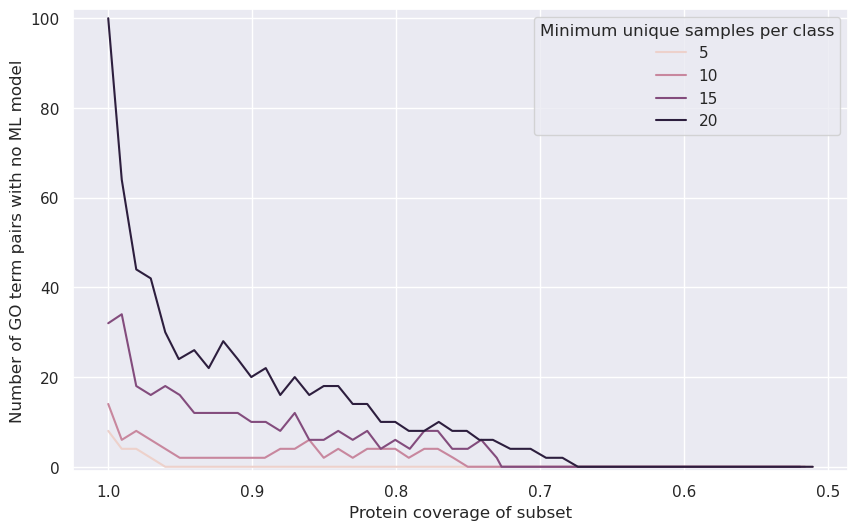

percentile 99


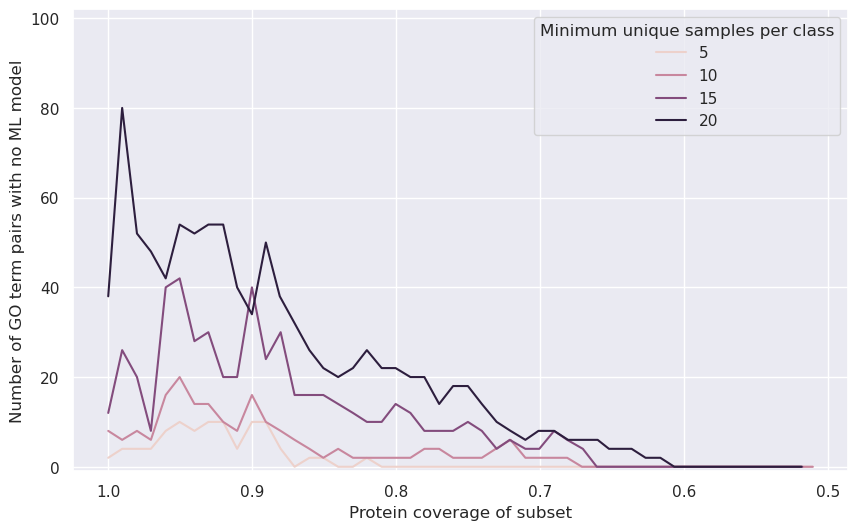

percentile 100


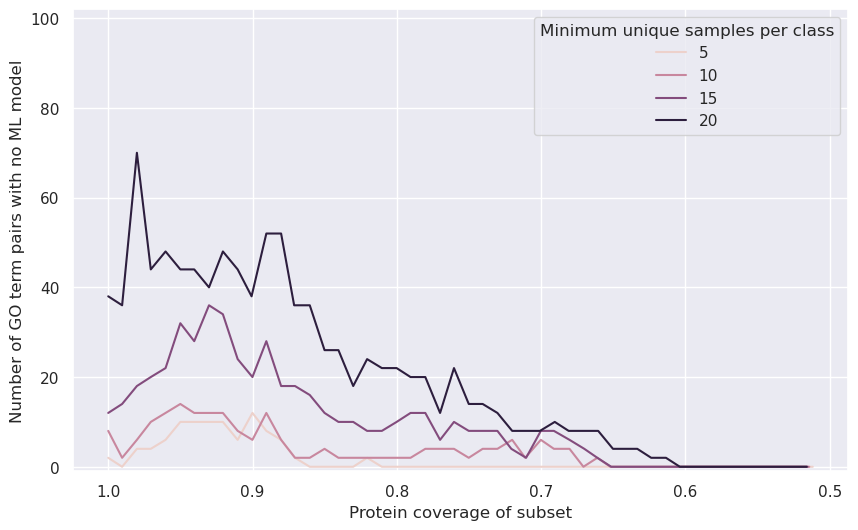

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# for prefer_abstract_terms in [True, False]:
for percentile in [95, 99, 100]:
    g = sns.lineplot(
        df_plot[
            (df_plot.prefer_abstract_terms == False)
            & (df_plot.max_samples_percentile == percentile)
        ],
        x="coverage",
        y="nans",
        hue="min_unique_samples_per_term",
    )
    g.invert_xaxis()
    g.set_ylim((-1, df_plot.nans.max() + 2))
    g.set_ylabel("Number of GO term pairs with no ML model")
    g.set_xlabel("Protein coverage of subset")
    # g.set_title(
    #     f"{percentile}th percentile"
    # )
    print("percentile", percentile)
    g.legend(title="Minimum unique samples per class")
    plt.savefig(f"nans_meta4_{percentile}.png")
    plt.show()

Coverage vs. mean F1 score

percentile 95


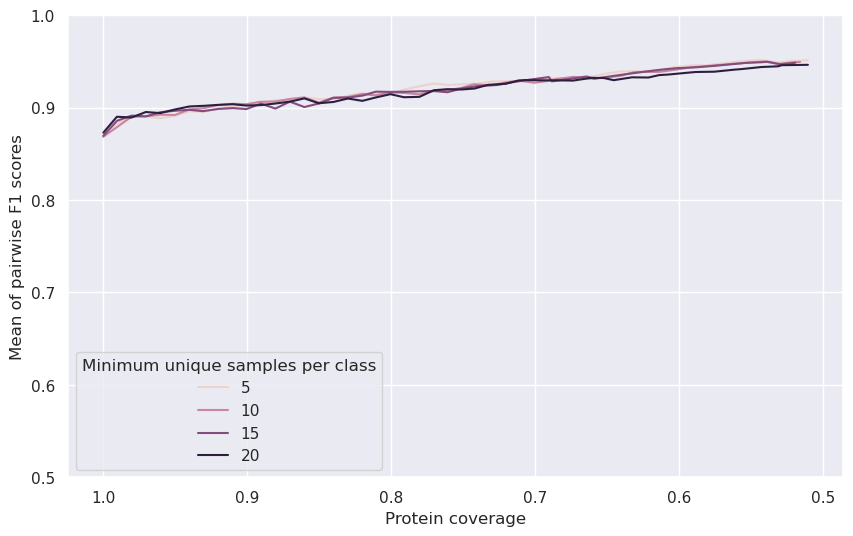

percentile 99


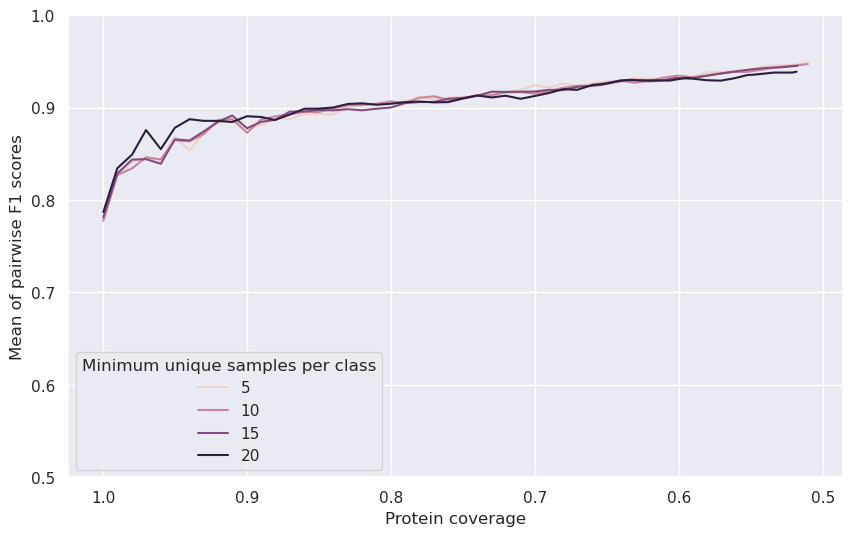

percentile 100


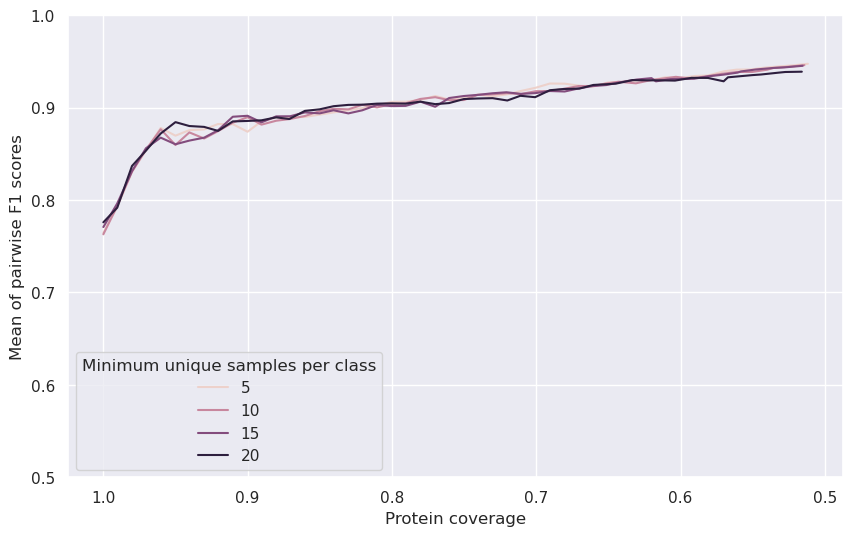

In [19]:
# for prefer_abstract_terms in [True, False]:
for percentile in [95, 99, 100]:
    g = sns.lineplot(
        df_plot[
            (df_plot.prefer_abstract_terms == False)
            & (df_plot.max_samples_percentile == percentile)
        ],
        x="coverage",
        y="mean",
        hue="min_unique_samples_per_term",
    )
    g.invert_xaxis()
    g.set_xlabel("Protein coverage")
    g.set_ylabel("Mean of pairwise F1 scores")
    g.legend(title="Minimum unique samples per class")
    g.set_ylim((0.5, 1))
    print("percentile", percentile)

    # g.set_title(
    #     f"prefer_abstract_terms {prefer_abstract_terms} | percentile {percentile}"
    # )
    plt.savefig(f"mean_meta4_{percentile}.png")

    plt.show()

Coverage vs median f1 score

percentile 95


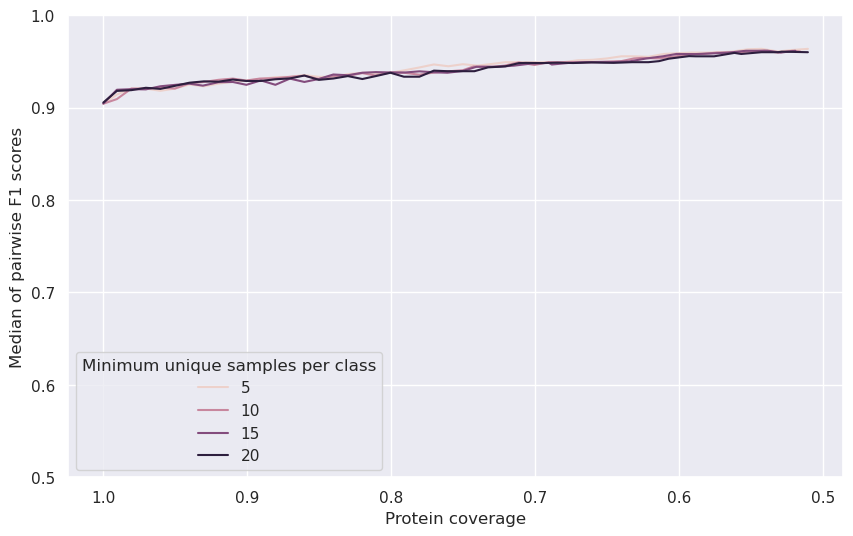

percentile 99


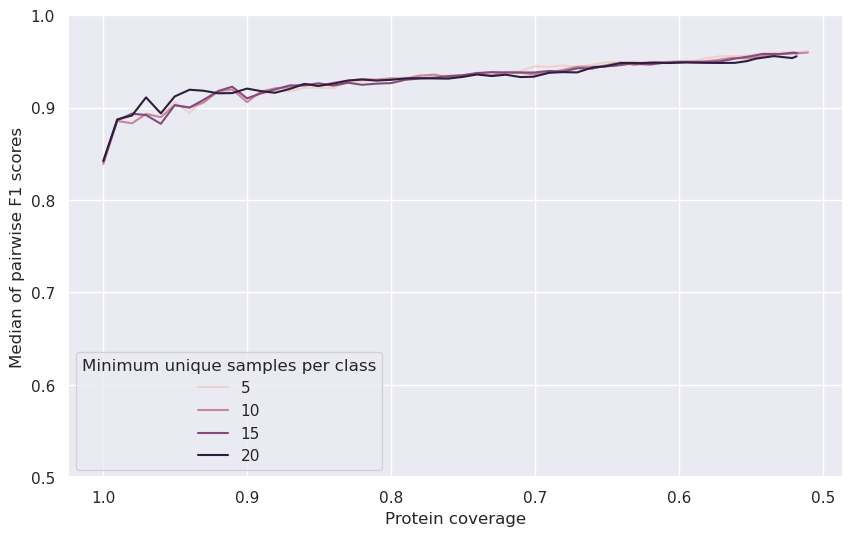

percentile 100


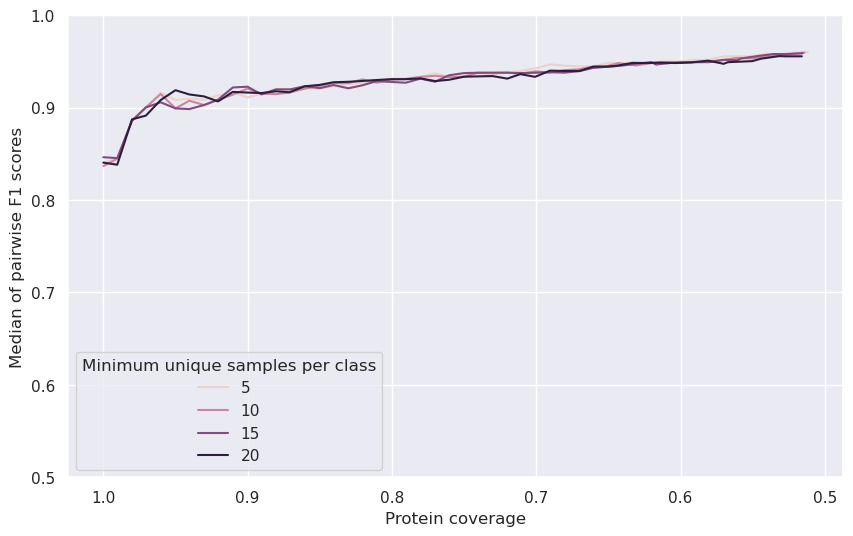

In [20]:
# for prefer_abstract_terms in [True, False]:
for percentile in [95, 99, 100]:
    g = sns.lineplot(
        df_plot[
            (df_plot.prefer_abstract_terms == False)
            & (df_plot.max_samples_percentile == percentile)
        ],
        x="coverage",
        y="median",
        hue="min_unique_samples_per_term",
    )
    g.invert_xaxis()
    g.set_xlabel("Protein coverage")
    g.set_ylabel("Median of pairwise F1 scores")
    g.legend(title="Minimum unique samples per class")
    g.set_ylim((0.5, 1))
    print("percentile", percentile)
        

    # g.set_title(
    #     f"prefer_abstract_terms {prefer_abstract_terms} | percentile {percentile}"
    # )
    plt.savefig(f"median_meta4_{percentile}.png")

    plt.show()

Coverage vs. subset length vs min_unique_samples

percentile 95


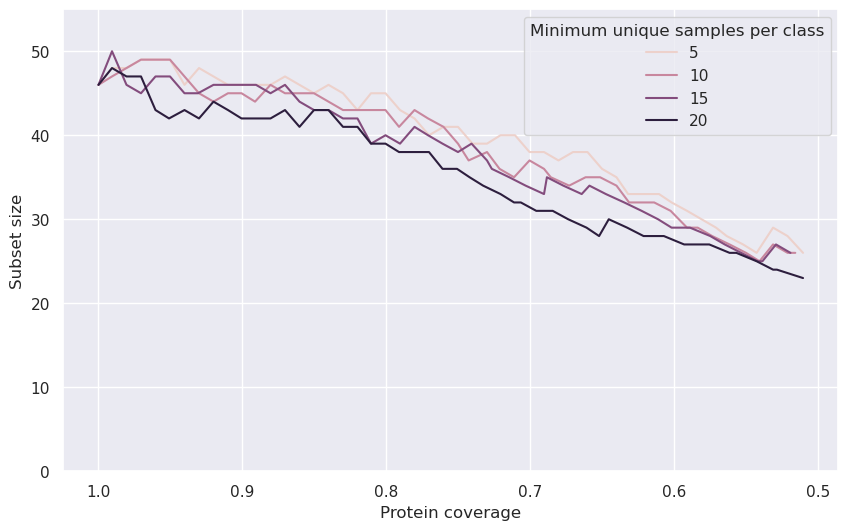

percentile 99


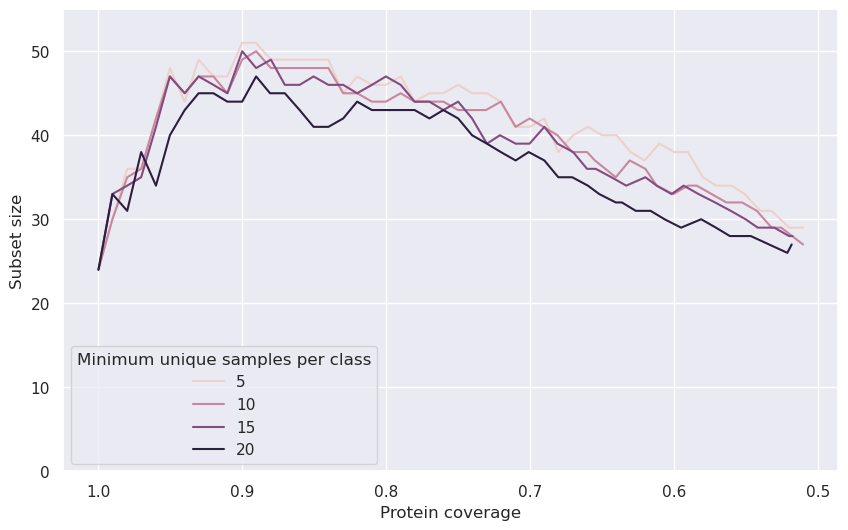

percentile 100


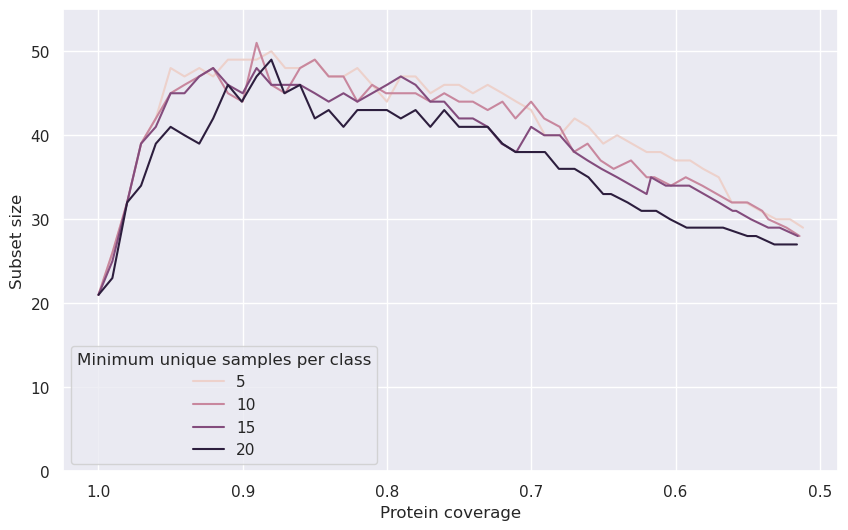

In [21]:
# for prefer_abstract_terms in [True, False]:
for percentile in [95, 99, 100]:
    g = sns.lineplot(
        df_plot[
            (df_plot.prefer_abstract_terms == True)
            & (df_plot.max_samples_percentile == percentile)
        ],
        x="coverage",
        y="subset_length",
        hue="min_unique_samples_per_term",
    )
    g.invert_xaxis()
    g.set_ylim((0, 55))
    g.set_xlabel("Protein coverage")
    g.set_ylabel("Subset size")
    g.legend(title="Minimum unique samples per class")
    print("percentile", percentile)

    # g.set_title(
    #     f"prefer_abstract_terms {prefer_abstract_terms} | percentile {percentile}"
    # )
    plt.savefig(f"subset_size_meta4_{percentile}.png")
        
    plt.show()

At a coverage of 100%, we have few terms as a result (around 20) that are very abstract. This leads to low average F1 scores, and to many pairs with too much overlap to train a ML model (i.e. many NaNs). With lowerering coverage we get more go terms in the subset, the maximum is at 90% coverage at around 45-50 terms. This means we are removing the most abstract terms first, and replace them each with several terms that have fewer proteins. This also improves the average pairwise scores. Only at a coverage of around 50%-60% do we get good F1 scores, along with no NaNs. At less than 90% coverage, the subset sizes become lower again, approaching a length of 25 at 50% coverage. 

We tried to remove the terms with the most samples before applying the pipeline, similar to how we are removing the terms with less than 20 proteins. Instead of removing all GO terms with more than a fixed number of proteins, we looked at the distribution of protein counts across the GO terms, and removed the 1% of GO terms with the most proteins. The 99th percentile was at 454.44 proteins, while the highest number of proteins for any GO term was 815. This approach removed seven GO terms from the dataset. Removing these seven proteins did not have a major impact on the results. The 95th percentile of protein counts was 110.6 proteins, and 35 terms were removed. When removing the 95th percentile of GO terms, we now get good results at higher coverage.

Less than 50 terms when excluding ecoli?

Results for manuscript:

x Stats on number of transporters, at 70% vs. 100% and four organisms vs. all

- sub-table

x Results without removing 95th percentile (the plots)

x Results after removing 95th percentile

Results without other organism? Which organism has the highest number of unique go terms?

x Final optimized dataset for meta-organism, with overlap heatmap

99th percentile: 454.4399999999987
max 815
terms with lower count 688
would remove 7
95th percentile: 110.59999999999991
max 815
terms with lower count 660
would remove 35


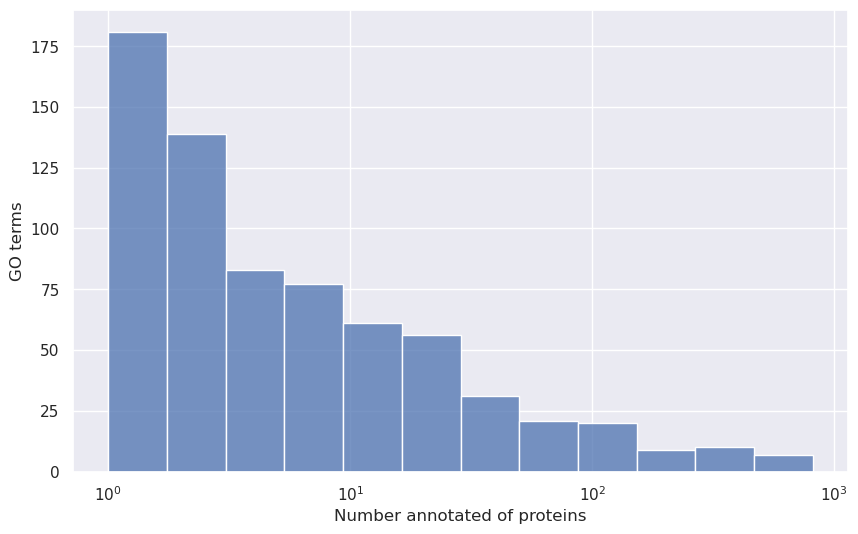

In [22]:
# Removing root node, since all are annotated with that anyway and it gets removed by pipeline
protein_counts = [
    len(proteins)
    for go_id, proteins in go_id_to_proteins.items()
    if go_id != "GO:0022857"
]

print("99th percentile:", np.percentile(protein_counts, 99))
print("max", np.max(protein_counts))
print(
    "terms with lower count",
    len(
        [
            protein_count
            for protein_count in protein_counts
            if protein_count <= np.percentile(protein_counts, 99)
        ]
    ),
)
print(
    "would remove",
    len(
        [
            protein_count
            for protein_count in protein_counts
            if protein_count > np.percentile(protein_counts, 99)
        ]
    ),
)

print("95th percentile:", np.percentile(protein_counts, 95))
print("max", np.max(protein_counts))
print(
    "terms with lower count",
    len(
        [
            protein_count
            for protein_count in protein_counts
            if protein_count <= np.percentile(protein_counts, 95)
        ]
    ),
)
print(
    "would remove",
    len(
        [
            protein_count
            for protein_count in protein_counts
            if protein_count > np.percentile(protein_counts, 95)
        ]
    ),
)

g = sns.histplot(protein_counts, log_scale=True)

g.set_xlabel("Number annotated of proteins")
g.set_ylabel("GO terms")
plt.savefig("go_protein_dist_log_meta4.png")
plt.show()

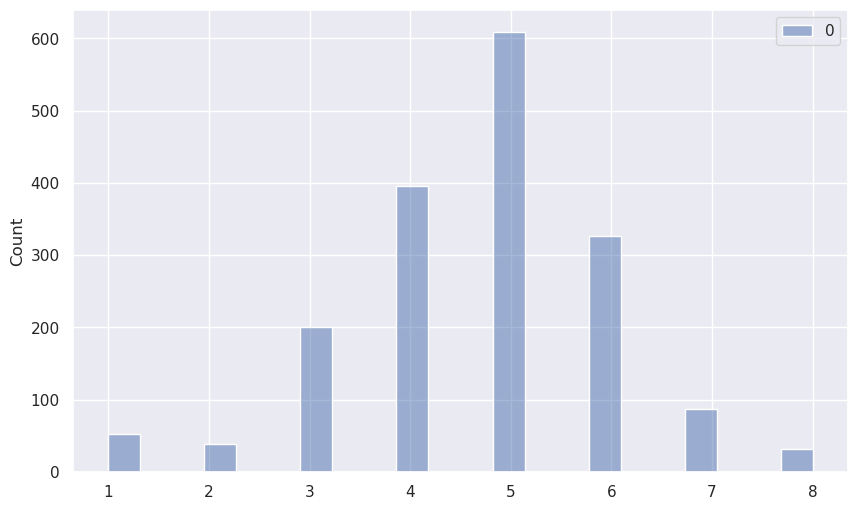

In [23]:
from subpred.go_redundancy import get_go_id_to_level

go_id_to_level = get_go_id_to_level(df_uniprot_goa.go_id_ancestor.unique())
protein_to_go_ids = (
    df_uniprot_goa[["Uniprot", "go_id_ancestor"]]
    .groupby("Uniprot")
    .agg(set)
    .go_id_ancestor.to_dict()
)
protein_to_maxlevel = {
    protein: max({go_id_to_level[go_id] for go_id in go_ids})
    for protein, go_ids in protein_to_go_ids.items()
}
sns.set_theme(rc={"figure.figsize": (10, 6)})
sns.histplot(protein_to_maxlevel.values())
plt.show()

In [24]:
best_subset, scores_best = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    max_samples_percentile=95,
    min_unique_samples_per_term=5,  # also try 10, together with coverage 70%, or 20 with even lower TODO
    min_coverage=0.96,  # TODO as high as possible
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=False,
    dataset_name="meta4",
)
scores_best

coverage          0.960376
mean              0.888620
median            0.918208
std               0.102971
nans              0.000000
subset_length    49.000000
dtype: float64

In [25]:
import numpy as np
from subpred.overlap_matrix import get_go_overlap_matrix, plot_go_overlap_matrix

df_go_overlaps = get_go_overlap_matrix(
    df_uniprot_goa=df_uniprot_goa, exclude_iea=True
)

def get_overlap_plot(subset,df_go_overlaps=df_go_overlaps, filename=None):
    # the percentage of proteins annotated with GO term 1 (x axis) that is also annotated with GO term2
    best_subset_overlaps = df_go_overlaps.loc[subset, subset].rename(
        columns=go_id_to_term, index=go_id_to_term
    )
    best_subset_overlaps = best_subset_overlaps.loc[
        sorted(best_subset_overlaps.index), sorted(best_subset_overlaps.columns)
    ]

    best_subset_overlaps = best_subset_overlaps / np.diag(best_subset_overlaps)

    tmp = best_subset_overlaps.copy()
    np.fill_diagonal(tmp.values, 0)
    print("median", tmp.median(axis=None).round(2))
    print("mean", tmp.mean(axis=None).round(2))

    g = sns.heatmap(best_subset_overlaps, annot=True, fmt=".2f")
    g.set_xlabel("GO term 1")
    g.set_ylabel("GO term 2")
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches="tight")
    return g

median 0.0
mean 0.02


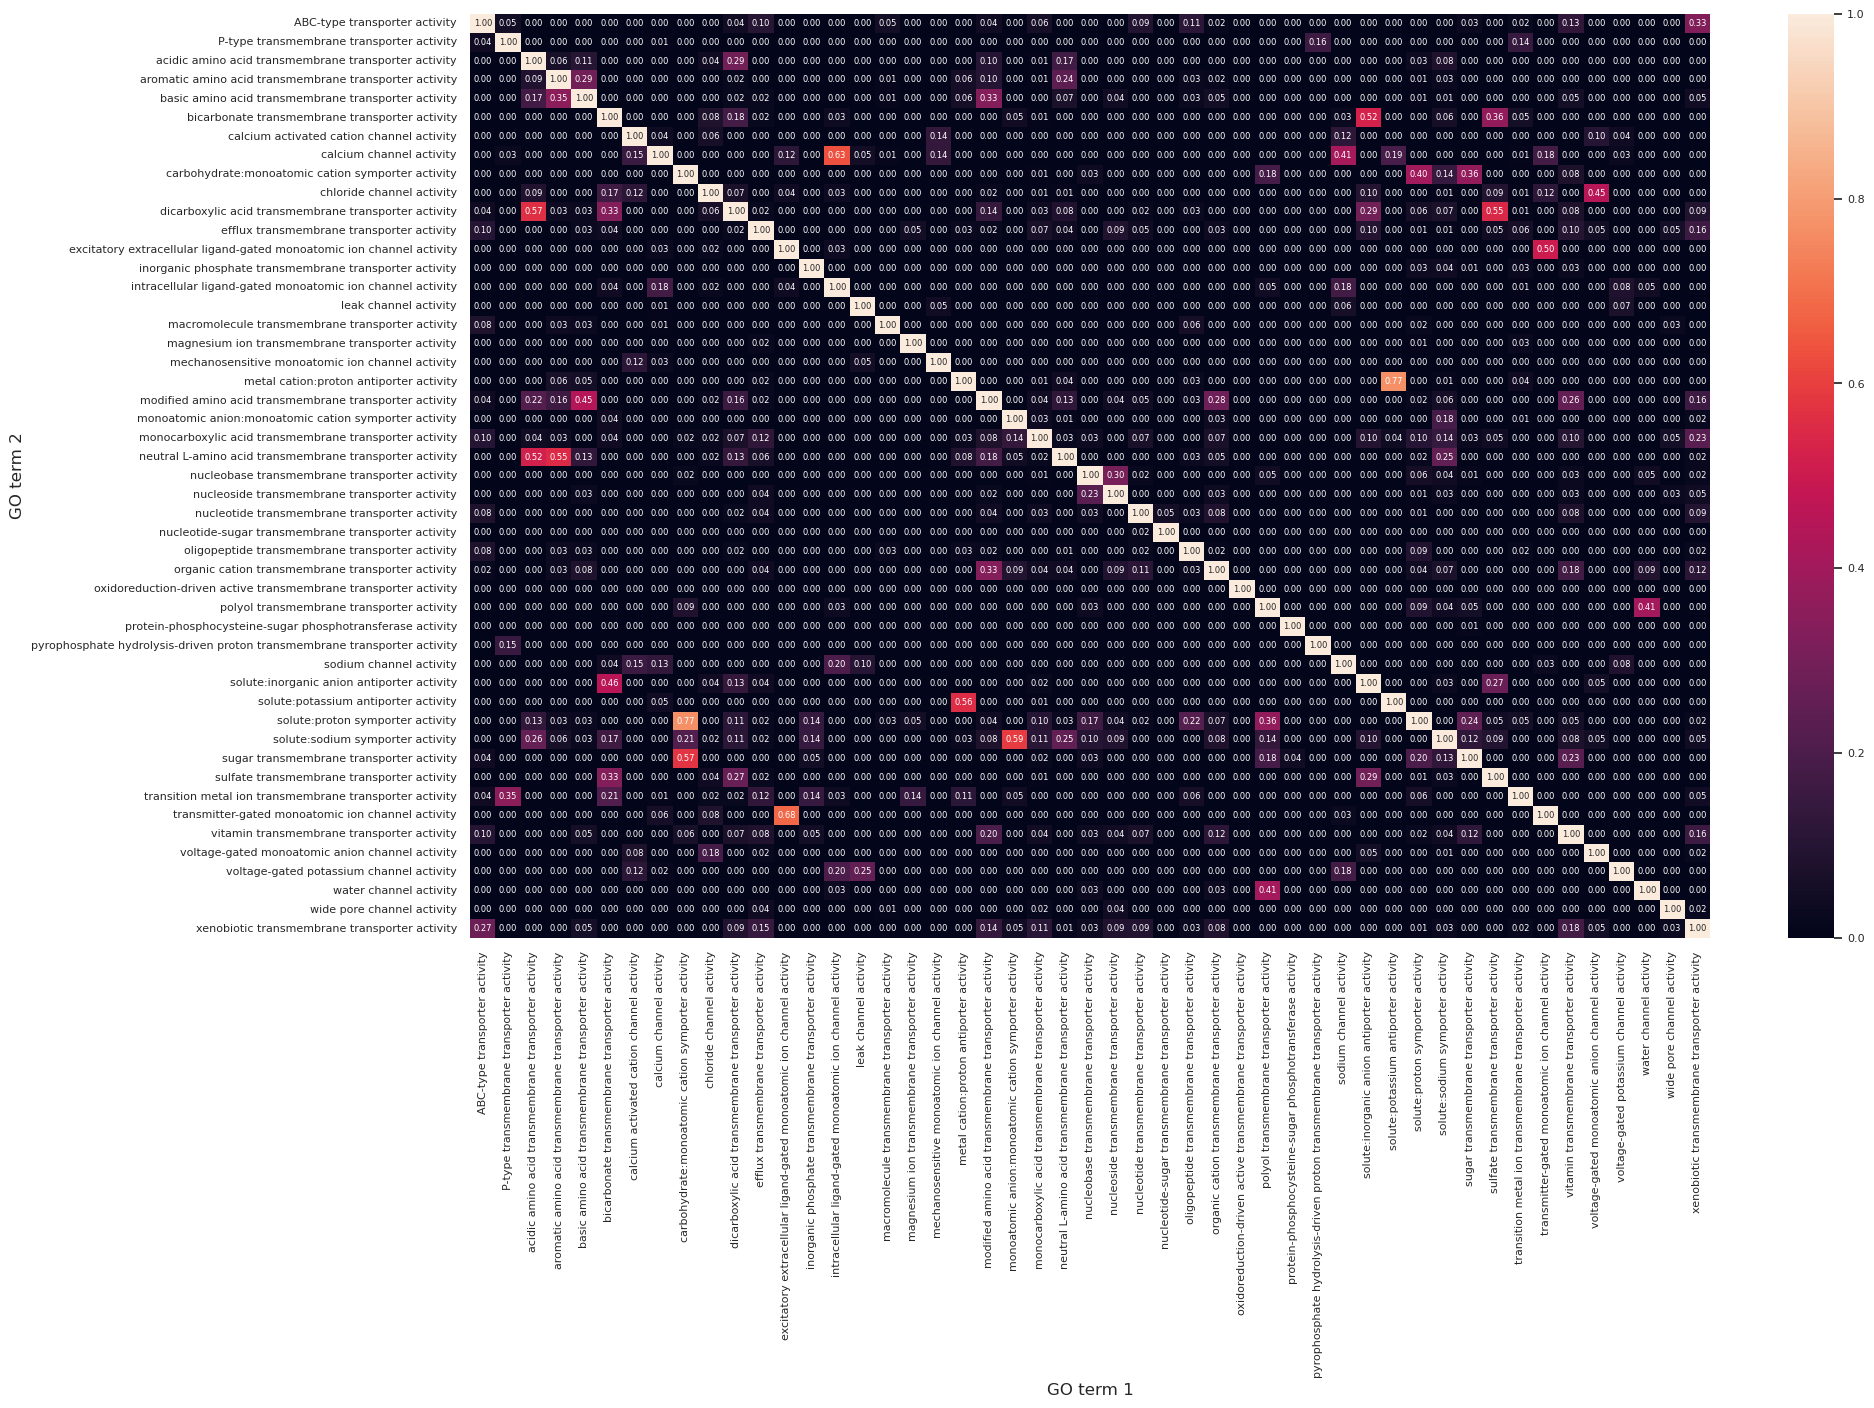

In [26]:
with sns.plotting_context({'font.size': 6, 'ytick.labelsize': 8,  'xtick.labelsize': 8}):
    plt.figure(figsize=(20,12))
    get_overlap_plot(best_subset, filename="overlaps-concrete.png")
    plt.savefig("overlaps_meta4.png",dpi=300, bbox_inches="tight")